In [63]:
import pandas as pd
from google.colab import files
import io
uploaded = files.upload()

Saving global_apps_by_downloads_playstore_reviews_telegram.csv to global_apps_by_downloads_playstore_reviews_telegram (2).csv


In [64]:
df = pd.read_csv(io.BytesIO(uploaded['global_apps_by_downloads_playstore_reviews_telegram.csv']))
df.head()

,reviewId,content,score,app,category
0,827be33e-f484-4bf8-88ea-4e66e495542b,Good,5,Facebook,social
1,4ff31249-7a69-44c6-bfd7-e11e80252733,🍔🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉🙉३🦅🦅🦅🦅🦅,3,Facebook,social
2,743db8b8-006f-4b50-824d-7be19fe3bcaf,"Mix Facebook, click to watch, it doesn't happe...",5,Facebook,social
3,db73c2ea-b46f-4528-a732-4f0092a14973,So so,1,Facebook,social
4,83247189-dc5b-4081-a195-4636ad868810,Very good,5,Facebook,social


In [65]:
df.shape

(50000, 5)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviewId  50000 non-null  object
 1   content   49996 non-null  object
 2   score     50000 non-null  int64 
 3   app       50000 non-null  object
 4   category  50000 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.9+ MB


In [67]:
df.isnull().sum()

reviewId    0
content     4
score       0
app         0
category    0
dtype: int64

In [68]:
#Removing the null values

df['content']=df['content'].fillna("")

In [69]:
df.isnull().sum()

reviewId    0
content     0
score       0
app         0
category    0
dtype: int64

As I want to perform analysis only on Telegram App Reviews. I'm selecting only the reviews relating to telegram.

Also the shape of reviews relating to telegram only.

In [70]:
df = df[df["app"]=="Telegram"]
df.shape

(5000, 5)

In [71]:
df.head()

,reviewId,content,score,app,category
30000,f421acf6-fd65-459d-944a-d23f80717e12,❤️❤️❤️❤️,4,Telegram,communication
30001,22a2f12d-a078-47b5-893d-581791ec0763,My account is not logging in when I try to log...,1,Telegram,communication
30002,aaf702a3-789b-4150-a798-e3d13964a04e,Well and helpful,5,Telegram,communication
30003,eaf28089-faa2-49cc-a0e3-eadbb52df0e2,Nice aap,5,Telegram,communication
30004,001e26b3-1887-4ca9-8737-38fda9b6d300,BakaR,1,Telegram,communication


In [72]:
print(df.mean())

score    3.758
dtype: float64


<ipython-input-72-f98cceecb4a0>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())


Choosing only required columns for performing Analysis

In [73]:
#PreProcessing START

df = df[['content','score','app']]
df.head(10)

,content,score,app
30000,❤️❤️❤️❤️,4,Telegram
30001,My account is not logging in when I try to log...,1,Telegram
30002,Well and helpful,5,Telegram
30003,Nice aap,5,Telegram
30004,BakaR,1,Telegram
30005,I Love this app more than any other app ( V❤️),5,Telegram
30006,PLEASE I NEED MY ACCOUNT BACK !! my account wa...,1,Telegram
30007,I am unable to find some of my friends in tele...,1,Telegram
30008,Nyce app,5,Telegram
30009,Very good,5,Telegram


Converting all the reviews to lowercase to get rid of unhelpful parts of the data, or noise.

In [74]:
df['content'] = df['content'].str.lower()
df.head(10)

,content,score,app
30000,❤️❤️❤️❤️,4,Telegram
30001,my account is not logging in when i try to log...,1,Telegram
30002,well and helpful,5,Telegram
30003,nice aap,5,Telegram
30004,bakar,1,Telegram
30005,i love this app more than any other app ( v❤️),5,Telegram
30006,please i need my account back !! my account wa...,1,Telegram
30007,i am unable to find some of my friends in tele...,1,Telegram
30008,nyce app,5,Telegram
30009,very good,5,Telegram


Removing Punctuations

In [75]:
df['content'] = df['content'].str.replace('[^A-Za-z0-9]+',' ',regex=True)
df.head(10)

,content,score,app
30000,,4,Telegram
30001,my account is not logging in when i try to log...,1,Telegram
30002,well and helpful,5,Telegram
30003,nice aap,5,Telegram
30004,bakar,1,Telegram
30005,i love this app more than any other app v,5,Telegram
30006,please i need my account back my account was h...,1,Telegram
30007,i am unable to find some of my friends in tele...,1,Telegram
30008,nyce app,5,Telegram
30009,very good,5,Telegram


Removingn Stopwords

In [76]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [77]:
stopwords = stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [78]:
df['TextwithoutStopwords'] = df['content'].apply(lambda x :' '.join([word.lower() for word in x.split() if word not in (stopwords)]))
df.head()



#PreProcessing DONE

,content,score,app,TextwithoutStopwords
30000,,4,Telegram,
30001,my account is not logging in when i try to log...,1,Telegram,account logging try login new phone
30002,well and helpful,5,Telegram,well helpful
30003,nice aap,5,Telegram,nice aap
30004,bakar,1,Telegram,bakar


Performing Lemmatization as it works on bases on words unlike tokenization which blindly slices few end characters from a word.

In [79]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
W_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [80]:
def lemmatize_Text(text):
  return [lemmatizer.lemmatize(w) for w in W_tokenizer.tokenize(text)]


In [81]:
df['lemmatized_tokens'] = df['TextwithoutStopwords'].apply(lemmatize_Text)
df.head()

,content,score,app,TextwithoutStopwords,lemmatized_tokens
30000,,4,Telegram,,[]
30001,my account is not logging in when i try to log...,1,Telegram,account logging try login new phone,"[account, logging, try, login, new, phone]"
30002,well and helpful,5,Telegram,well helpful,"[well, helpful]"
30003,nice aap,5,Telegram,nice aap,"[nice, aap]"
30004,bakar,1,Telegram,bakar,[bakar]


Text Exploratory Analysis

In [82]:
df['wordLength'] = df['TextwithoutStopwords'].str.split().str.len()
df.head()

,content,score,app,TextwithoutStopwords,lemmatized_tokens,wordLength
30000,,4,Telegram,,[],0
30001,my account is not logging in when i try to log...,1,Telegram,account logging try login new phone,"[account, logging, try, login, new, phone]",6
30002,well and helpful,5,Telegram,well helpful,"[well, helpful]",2
30003,nice aap,5,Telegram,nice aap,"[nice, aap]",2
30004,bakar,1,Telegram,bakar,[bakar],1


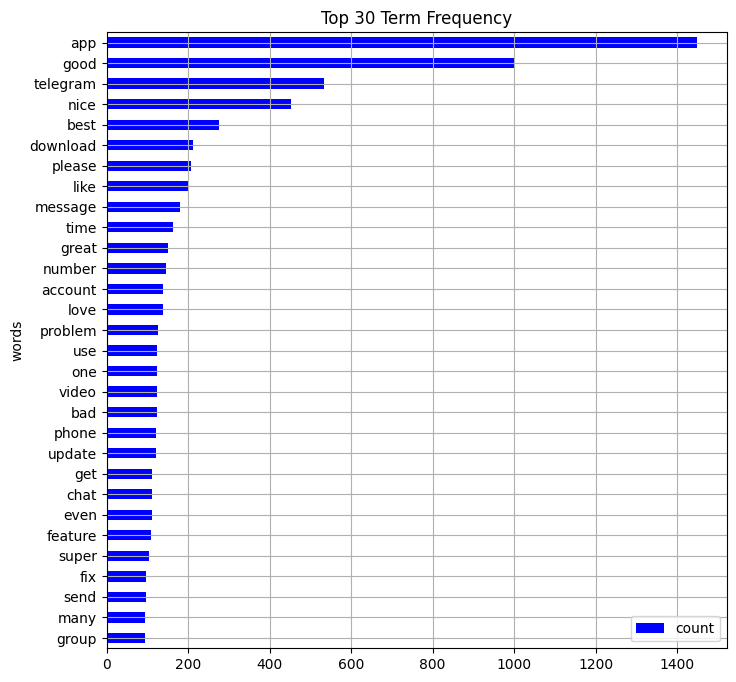

In [83]:
import itertools
import collections
import matplotlib.pyplot as plt
import pandas as pd


tokens = list(df['lemmatized_tokens'])
token_list = list(itertools.chain(*tokens))
counter = collections.Counter(token_list)
cleanText = pd.DataFrame(counter.most_common(30),
                            columns=['words','count'])

fig,ax = plt.subplots(figsize=(8,8))
cleanText.sort_values(by='count').plot.barh(x='words',
                                            y='count',
                                            ax=ax,
                                            color='blue')
plt.grid()
plt.title("Top 30 Term Frequency")
plt.show()

In [84]:
all_words=[]
for i in df['TextwithoutStopwords']:
  all_words.append(i)

all_words= ' '.join(all_words)


Drawing a WordCloud

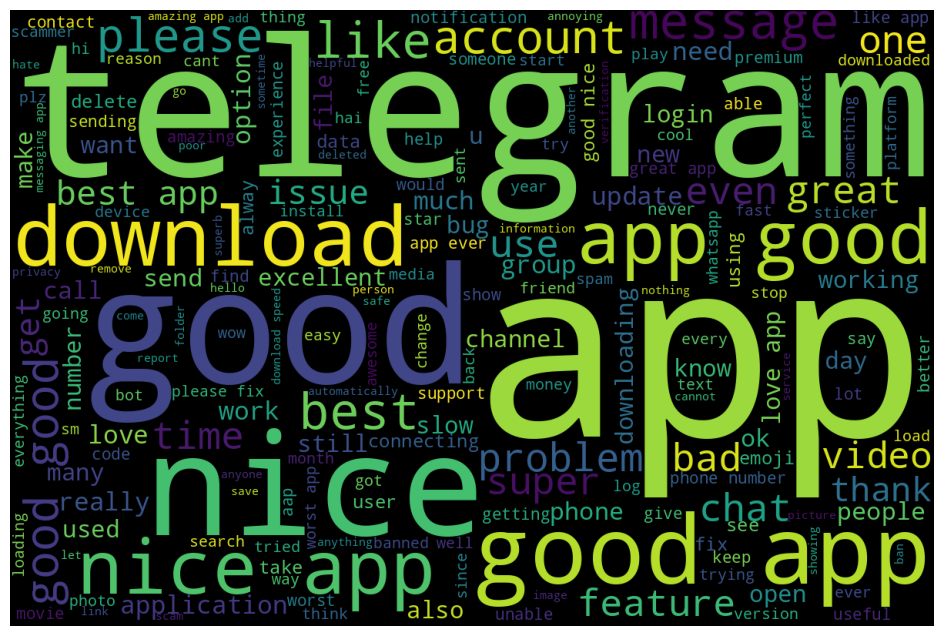

In [85]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1200, height=800,
                      background_color ='black',
                      stopwords=stopwords,
                      min_font_size=10).generate(all_words)
plt.figure(figsize=(15,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

POS Tagging

In [86]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

def POSTagging(text):
  tokens = word_tokenize(text)
  pos_tags = pos_tag(tokens)
  return [(token , pos) for token, pos in pos_tags]

In [87]:
df['POSTags'] = df['TextwithoutStopwords'].apply(POSTagging)
df.head()

,content,score,app,TextwithoutStopwords,lemmatized_tokens,wordLength,POSTags
30000,,4,Telegram,,[],0,[]
30001,my account is not logging in when i try to log...,1,Telegram,account logging try login new phone,"[account, logging, try, login, new, phone]",6,"[(account, NN), (logging, VBG), (try, VB), (lo..."
30002,well and helpful,5,Telegram,well helpful,"[well, helpful]",2,"[(well, RB), (helpful, JJ)]"
30003,nice aap,5,Telegram,nice aap,"[nice, aap]",2,"[(nice, JJ), (aap, NN)]"
30004,bakar,1,Telegram,bakar,[bakar],1,"[(bakar, NN)]"


POS Tags Count

In [88]:
from collections import Counter
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
def POSTagsCount(text):
  return (dict(Counter([j for i,j in pos_tag(word_tokenize(text))])))


In [89]:
df['POSTagsCount'] = df['TextwithoutStopwords'].apply(POSTagsCount)
df.head()

,content,score,app,TextwithoutStopwords,lemmatized_tokens,wordLength,POSTags,POSTagsCount
30000,,4,Telegram,,[],0,[],{}
30001,my account is not logging in when i try to log...,1,Telegram,account logging try login new phone,"[account, logging, try, login, new, phone]",6,"[(account, NN), (logging, VBG), (try, VB), (lo...","{'NN': 2, 'VBG': 1, 'VB': 1, 'JJ': 2}"
30002,well and helpful,5,Telegram,well helpful,"[well, helpful]",2,"[(well, RB), (helpful, JJ)]","{'RB': 1, 'JJ': 1}"
30003,nice aap,5,Telegram,nice aap,"[nice, aap]",2,"[(nice, JJ), (aap, NN)]","{'JJ': 1, 'NN': 1}"
30004,bakar,1,Telegram,bakar,[bakar],1,"[(bakar, NN)]",{'NN': 1}


In [90]:
!pip install vaderSentiment
!pip install TextBlob

In [91]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
df[['polarity', 'subjectivity']] = df['content'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in df['content'].items():

    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(row)

    neg = sentiment_dict['neg']
    neu = sentiment_dict['neu']
    pos = sentiment_dict['pos']


    if sentiment_dict['compound'] >= 0.30:
        df.loc[index, 'sentiment'] = "Positive"
    elif sentiment_dict['compound'] <= - 0.30:
        df.loc[index, 'sentiment'] = "Negative"
    else:
        df.loc[index, 'sentiment'] = "Neutral"

In [92]:
df.head()

,content,score,app,TextwithoutStopwords,lemmatized_tokens,wordLength,POSTags,POSTagsCount,polarity,subjectivity,sentiment
30000,,4,Telegram,,[],0,[],{},0.000000,0.000000,Neutral
30001,my account is not logging in when i try to log...,1,Telegram,account logging try login new phone,"[account, logging, try, login, new, phone]",6,"[(account, NN), (logging, VBG), (try, VB), (lo...","{'NN': 2, 'VBG': 1, 'VB': 1, 'JJ': 2}",0.136364,0.454545,Neutral
30002,well and helpful,5,Telegram,well helpful,"[well, helpful]",2,"[(well, RB), (helpful, JJ)]","{'RB': 1, 'JJ': 1}",0.000000,0.000000,Positive
30003,nice aap,5,Telegram,nice aap,"[nice, aap]",2,"[(nice, JJ), (aap, NN)]","{'JJ': 1, 'NN': 1}",0.600000,1.000000,Positive
30004,bakar,1,Telegram,bakar,[bakar],1,"[(bakar, NN)]",{'NN': 1},0.000000,0.000000,Neutral


In [93]:
df['sentiment'].value_counts()

Positive    2740
Neutral     1769
Negative     491
Name: sentiment, dtype: int64

Showing on a Pie Chart the number of Postive, Negative and Neutral Reviews


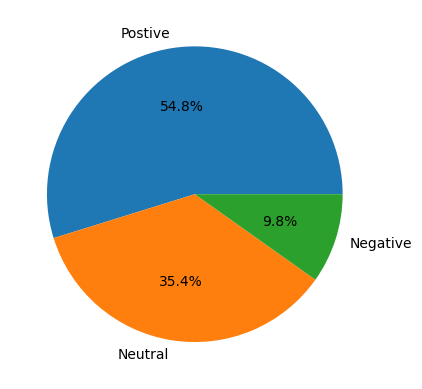

In [94]:
plt.pie(df['sentiment'].value_counts(), autopct='%1.1f%%', labels = ["Postive","Neutral","Negative"])
plt.show()